**Project Name: Credit Card Fraud Detection**

In [1]:
# Install xgboost (eXtreme Gradient Boosting)

!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # used for creating attractive and informative statistical graphics

from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

'''
pandas: load & explore data
matplotlib & seaborn: plots & visualization
train_test_split: divide data for training / testing
RandomForestClassifier & XGBClassifier: ML models
metrics: evaluate model performance

'''

'\npandas: load & explore data\nmatplotlib & seaborn: plots & visualization\ntrain_test_split: divide data for training / testing\nRandomForestClassifier & XGBClassifier: ML models\nmetrics: evaluate model performance\n\n'

**Step 2: Load Datasets**

In [3]:
url = "https://raw.githubusercontent.com/programmer-sahil/Ardent_ML_Training/main/Project%206/creditcard_synthetic.csv"
df = pd.read_csv(url)
df.head()


'''
The dataset contains transactions features(V1…V28), amount, class(0=normal, 1=fraud).
'''

'\nThe dataset contains transactions features(V1…V28), amount, class(0=normal, 1=fraud).\n'

**Step 3: Check Basic Info**

In [4]:
print(df.shape)
print(df['Class'].value_counts())

#shows dataset size (rows, columns)
# shows class imbalance: fraud cases are rare (IMPORTANT)

(15000, 30)
Class
0    14895
1      105
Name: count, dtype: int64


**Step 4: Class Distribution Validation**

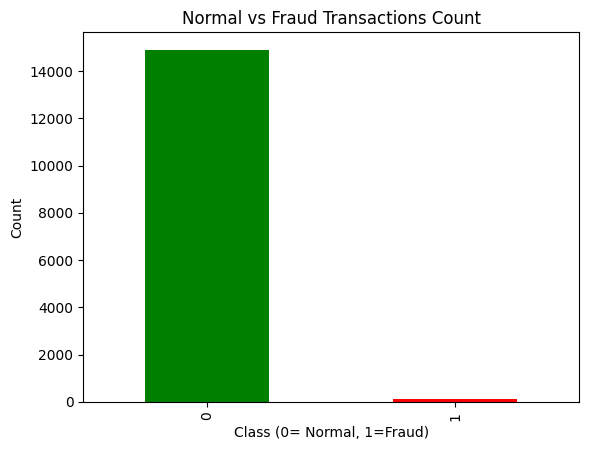

In [5]:
df['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Normal vs Fraud Transactions Count")
plt.xlabel("Class (0= Normal, 1=Fraud)")
plt.ylabel("Count")
plt.show()

# Fraud cases are very low compared to normal (real-life scenario)

**Step 5: Feature & Target Separation**

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']

# X = input features (transaction data)
# y = output label (fraud or not)

**Step 6: Train Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 20% test data
# stratify=y keeps fraud/normal ratio same in both sets

**Step 7: Model-1: Random Forest**

In [8]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

'''
n_estimators is number of trees
n_jobs=-1 use all CPU cores for speed
'''

'\nn_estimators is number of trees\nn_jobs=-1 use all CPU cores for speed\n'

**Step 8: RF PREDICTION & METRICS**

In [9]:
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print("Random Forest Metrics:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("ROC-AUC:", auc_rf)

'''
Because accuracy alone is misleading in imbalanced datasets.
recall is important bcz: Missing fraud (False Negative)= HIGH financial damage
'''

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Metrics:
Accuracy: 0.993
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5035726274396969


'\nBecause accuracy alone is misleading in imbalanced datasets.\nrecall is important bcz: Missing fraud (False Negative)= HIGH financial damage\n'

**Step 9: CONFUSION MATRIX VISUALIZATION**

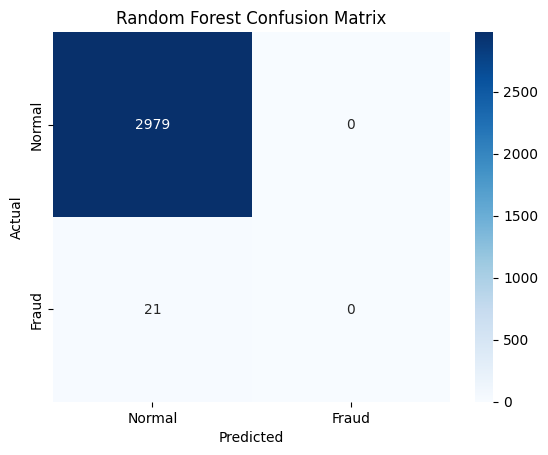

'\nTP = correctly detected fraud\n\nFN = missed fraud (dangerous)\n\nFP = flagged normal as fraud\n\nTN = normal detected correctly\n'

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal','Fraud'],
            yticklabels=['Normal','Fraud'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

'''
TP = correctly detected fraud

FN = missed fraud (dangerous)

FP = flagged normal as fraud

TN = normal detected correctly
'''

**STEP-10: MODEL-2 → XGBOOST**

In [11]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    eval_metric='logloss',
    n_jobs=-1
)

xgb.fit(X_train, y_train)

'''
XGBoost is boosting methods -> builds stronger trees iteratively
It often performs better on imbalanced data
'''

'\nXGBoost is boosting methods -> builds stronger trees iteratively\nIt often performs better on imbalanced data\n'

**STEP-11: XGB PREDICTION & METRICS**

In [12]:
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

print("XGBoost Metrics:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC-AUC:", auc_xgb)

XGBoost Metrics:
Accuracy: 0.993
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.38969612685624766


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**STEP-12: FEATURE IMPORTANCE (XGBOOST)**

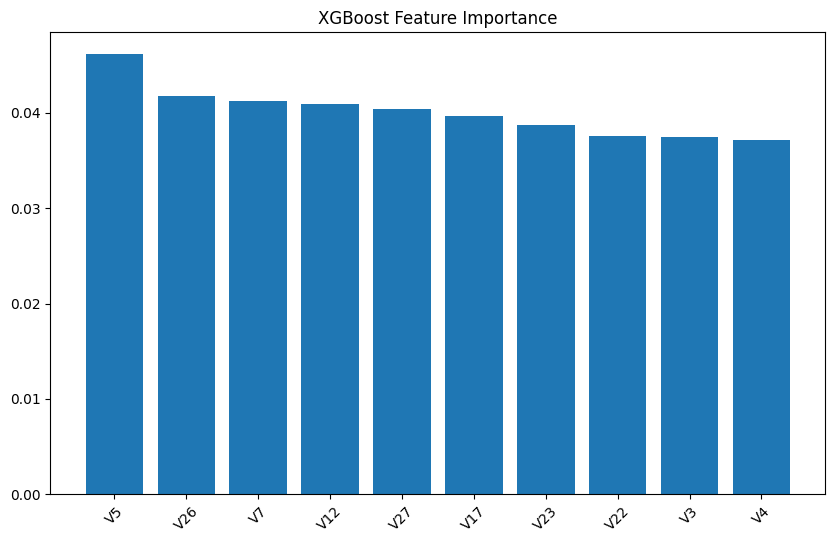

In [13]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost Feature Importance")
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), X.columns[indices][:10], rotation=45)
plt.show()

# Shows which transaction features contribute most to fraud detection.
